In [1]:
import uproot
import awkward as ak
from pathlib import Path
import time
import matplotlib.pyplot as plt

In [2]:
data_dir = Path("/project/etp1/dkoch/ATLASOpenData-test")
samples_new = {
    "ttbar": {
        "list": [
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000001.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000002.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000003.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000004.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000005.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000008.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000009.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000010.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000011.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000012.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000013.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000014.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000016.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000017.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000018.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000019.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000020.output_ntup.root",
        ]
    }
}
treename_new = "analysis"
branches_new = [
    "lep_pt","lep_eta","lep_phi",
    "lep_e","lep_charge","lep_type", "lep_n",
    "mcWeight",
    # "scaleFactor_PILEUP",
    # "scaleFactor_ELE",
    # "scaleFactor_MUON",
]

samples_old = {
    "ttbar": {
        "list": [
            "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_410000.ttbar_lep.2lep.root",
        ]
    }
}
treename_old = "mini"
branches_old = [
    "lep_pt","lep_eta","lep_phi",
    "lep_E","lep_charge","lep_type", "lep_n",
    "mcWeight", "scaleFactor_PILEUP",
    "scaleFactor_ELE","scaleFactor_MUON",
    "scaleFactor_LepTRIGGER",
]

In [3]:
def get_new_data(samples, treename, branches):
    data = {}
    for s in samples:
        print(f"processing {s} samples")
        chunks = []
        for chunk in uproot.iterate({file: treename for file in samples[s]["list"]}, expressions=branches):
            n_in = len(chunk)
            chunk = chunk[chunk.lep_n>=2]
            n_out = len(chunk)
            print(f"  processed {n_in} events, kept {n_out}")
            chunks.append(chunk)
        data[s] = ak.concatenate(chunks)
    return data

In [4]:
start = time.time()
data_new = get_new_data(samples_new, treename_new, branches_new)
end = time.time()
print(f"took {end - start}s")

processing ttbar samples
  processed 2264205 events, kept 1139696
  processed 718296 events, kept 361488
  processed 2265261 events, kept 1139132
  processed 675825 events, kept 340396
  processed 2264363 events, kept 1139690
  processed 676136 events, kept 339811
  processed 2264276 events, kept 1140493
  processed 698102 events, kept 351868
  processed 1232444 events, kept 620306
  processed 2264517 events, kept 1140644
  processed 624341 events, kept 313797
  processed 2262035 events, kept 1138823
  processed 680526 events, kept 342593
  processed 2115044 events, kept 1063854
  processed 2263065 events, kept 1139641
  processed 308967 events, kept 155439
  processed 2262731 events, kept 1138381
  processed 1437536 events, kept 723382
  processed 2261535 events, kept 1139988
  processed 1360815 events, kept 684508
  processed 517115 events, kept 260610
  processed 2037013 events, kept 1024627
  processed 1443472 events, kept 725252
  processed 2010723 events, kept 1012302
  processed

In [5]:
start = time.time()
data_old = get_new_data(samples_old, treename_old, branches_old)
end = time.time()
print(f"took {end - start}s")

processing ttbar samples
  processed 1847000 events, kept 1847000
  processed 1063539 events, kept 1063539
took 33.059284687042236s


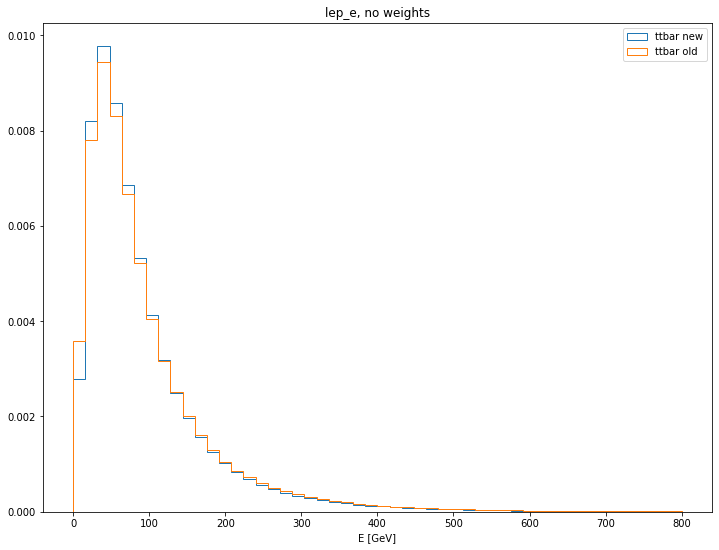

In [6]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].lep_e), range=(0, 800), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].lep_E)/1000, range=(0, 800), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("lep_e, no weights")
plt.xlabel("E [GeV]")
plt.show()